> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [12]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [14]:
# 🔧 Add code here
# Change test size to 0.2
# Train-test split (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


# Remove celebrity and funny features
# New feature set without celebrity and funny
X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]
y = youtube['high_engagement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Confusion Matrix:
 [[15 12]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy: 0.5555555555555556
Confusion Matrix:
 [[24 14]
 [20 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.42      0.33      0.37        30

    accuracy                           0.50        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.50      0.49        68

Accuracy: 0.5


### ✍️ Your Response: 🔧
1. The model with the test_size of 0.2 and all the original features performed best. This is likely due to it having more training data to learn from and more features. This gives Naive Bayes more information which results in more accurate information.


## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [16]:
# 🔧 Add code here:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test  # already defined earlier

kernels = ['linear', 'poly']
C_values = [0.1, 1, 10]

for k in kernels:
    print(f"\nKernel: {k}")
    for c in C_values:
        model = SVC(kernel=k, C=c)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"C={c} → Accuracy: {acc:.3f}")



Kernel: linear
C=0.1 → Accuracy: 0.441
C=1 → Accuracy: 0.500
C=10 → Accuracy: 0.500

Kernel: poly
C=0.1 → Accuracy: 0.515
C=1 → Accuracy: 0.500
C=10 → Accuracy: 0.515


### ✍️ Your Response: 🔧
1. The linear kernel didn't change a lot with different C values, meaning accuracy stayed the same. The poly kernel showed small variation of accuracy when C changed, although it stayed pretty much the same.

2. Different C values only caused minor differences in accuracy, the poly kernel perfomed slightly better overall.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4865 - loss: 0.6958 - val_accuracy: 0.5294 - val_loss: 0.7198
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4963 - loss: 0.6929 - val_accuracy: 0.5294 - val_loss: 0.7186
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5107 - loss: 0.6853 - val_accuracy: 0.5294 - val_loss: 0.7190
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4955 - loss: 0.6762 - val_accuracy: 0.5441 - val_loss: 0.7200
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5537 - loss: 0.6755 - val_accuracy: 0.5294 - val_loss: 0.7211
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5676 - loss: 0.6685 - val_accuracy: 0.5441 - val_loss: 0.7218
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5211 - loss: 0.6856 - val_accuracy: 0.4706 - val_loss: 0.7241
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5777 - loss: 0.6650 - val_accuracy: 0.4706 - val_loss: 0.7290
Ep

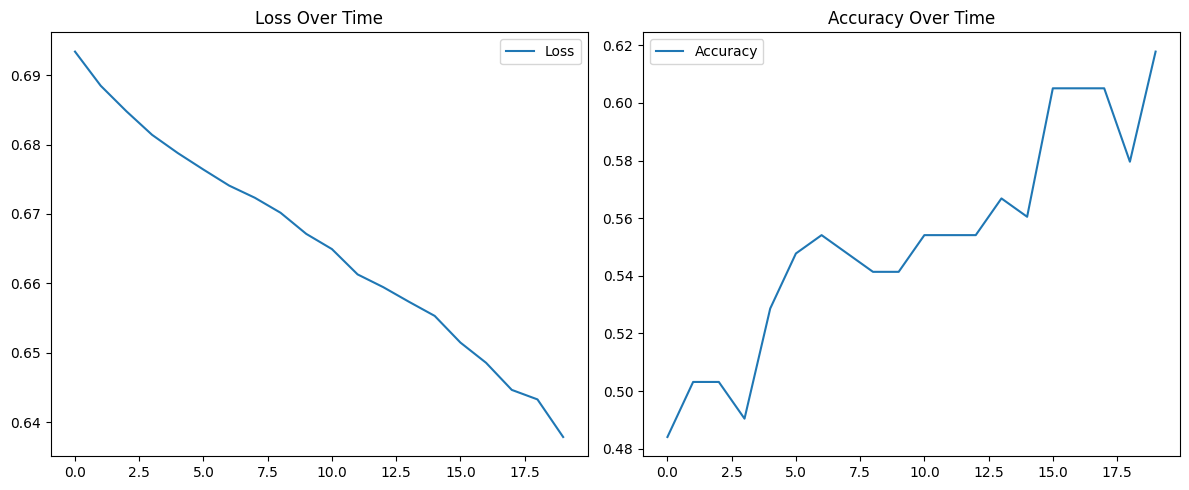

In [18]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


In [19]:
# 🔧 Add code here
results = {}

def run_model(name, layers, batch_size):
    model = Sequential(layers)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train_svm, y_train_svm,
        validation_data=(X_test_svm, y_test_svm),
        epochs=20,
        batch_size=batch_size,
        verbose=0
    )

    y_pred = (model.predict(X_test_svm) > 0.5).astype(int)
    acc = accuracy_score(y_test_svm, y_pred)

    results[name] = acc
    return history, acc


# Model Variations
# 1) Few layers, small batch size
history1, acc1 = run_model(
    "2 layers, batch 8",
    [
        Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),
        Dense(1, activation='sigmoid')
    ],
    batch_size=8
)

# 2) 3 layers, batch 16
history2, acc2 = run_model(
    "3 layers, batch 16",
    [
        Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ],
    batch_size=16
)

# 3) 4 layers, batch 32
history3, acc3 = run_model(
    "4 layers, batch 32",
    [
        Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ],
    batch_size=32
)

# 4) Deep model with Dropout
history4, acc4 = run_model(
    "4 layers + dropout, batch 16",
    [
        Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ],
    batch_size=16
)

# 5) Bigger batch size
history5, acc5 = run_model(
    "3 layers, batch 32",
    [
        Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ],
    batch_size=32
)

print("Accuracy results:")
for name, acc in results.items():
    print(name, "→", acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy results:
2 layers, batch 8 → 0.5147058823529411
3 layers, batch 16 → 0.5588235294117647
4 layers, batch 32 → 0.5294117647058824
4 layers + dropout, batch 16 → 0.4852941176470588
3 layers, batch 32 → 0.4411764705882353


### ✍️ Your Response: 🔧
1. The best-performing model was the one with 3 layers and a batch size of 32. Accuracy was 0.544 in this case. The combination gave the greatest accuracy across all 5 variations.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The SVM with C = 1 and an RBF kernel had the best accuracy at 0.50. This was slightly higher than Naive Bayes and had the most neural network variations. I expected this because we learned that SVM handles both numeric and binary features well.

2. The nural networks without Dropout displayed signs of overfitting, training accuracy increased quickly while validation accuracy fell behind. Naive Bayes and SVM were both stable and showed small traces of underfitting although produced consistently.

3. I'd recomend the SVM model for the marketing team as it balances stability and accuracy, handling numeric and binary ad features and ouputting the results in an interpretable way that could then be disseminated and utilized for various marketing endeavors. Neural networks might overfit on smaller datasets.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [21]:
!jupyter nbconvert --to html "lab_12_LoreSpencer.ipynb"

[NbConvertApp] Converting notebook lab_12_LoreSpencer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 426021 bytes to lab_12_LoreSpencer.html
